# Bike Sharing Analysis

## Tujuan

Tujuan dari portofolio data analisis ini adalah untuk memperoleh wawasan mengenai kinerja dari program peminjaman sepeda dan perilaku penggunanya. Tujuan utamanya yaitu untuk melihat pola penggunaan. Dengan mencapai tujuan ini, portofolio ini menargetkan untuk memberdayakan program peminjaman sepeda dengan wawasan yang dapat ditindaklanjuti, yang mengarah pada peningkatan efisiensi operasional, pengalaman pengguna yang lebih baik, serta pertumbuhan dan kesuksesan layanan kami yang berkelanjutan. Analisis ini akan memungkinkan pengambilan keputusan yang tepat untuk pemasaran, ekspansi, dan alokasi sumber daya berdasarkan wawasan berbasis data.

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan jumlah peminjaman sepeda dari waktu ke waktu?
- Bagaimana pengaruh temperatur terhadap jumlah peminjaman sepeda?
- Apakah cuaca mempengaruhi peminjaman sepeda?
- Kapan waktu favorit peminjaman sepeda?
- Apakah musim mempengaruhi jumlah peminjaman sepeda?

## Menyiapkan semua library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import squarify

## Data Wrangling

### Gathering Data

In [4]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Kesalahan tipe data pada kolom "dteday"

Memeriksa *missing value*

In [6]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa data duplikat

In [7]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Cleaning Data

Mengubah tipe data pada kolom "dteday"

In [9]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data

In [11]:
hour_df.describe(include='all')

<ipython-input-11-8c27de8cc91c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include='all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Terdapat sebanyak 17379 jam atau 731 hari peminjaman sepeda dari tanggal 1 Januari 2011 sampai 31 Desember 2012. Rata-rata peminjaman setiap jam ada sekitar 189 peminjaman dengan standar deviasi 181.

In [12]:
hour_df.corr()

<ipython-input-12-3394dad3ede6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hour_df.corr()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


Temperatur memiliki korelasi paling tinggi dengan jumlah peminjam kemudian diikuti oleh jam.

In [13]:
converted_temp_df = hour_df
converted_temp_df['converted_temp'] = converted_temp_df['temp']*(41-(-8))+(-8)
converted_temp_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,converted_temp
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,3.76
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2.78
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2.78
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,3.76
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,3.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,4.74
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,4.74
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,4.74
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,4.74


In [14]:
converted_temp_df.groupby(['converted_temp']).cnt.mean()

converted_temp
-7.02      41.882353
-6.04      35.625000
-5.06      42.000000
-4.08      28.235294
-3.10      49.294118
-2.12      58.421053
-1.14      55.108696
-0.16      65.578261
 0.82      60.116129
 1.80      79.745763
 2.78      69.914489
 3.76      80.159004
 4.74      87.960644
 5.72     106.750831
 6.70     115.917317
 7.68     134.230769
 8.66     135.308527
 9.64     147.842027
 10.62    164.212366
 11.60    167.441368
 12.58    175.341241
 13.56    158.907298
 14.54    162.906977
 15.52    190.434028
 16.50    198.429379
 17.48    202.967626
 18.46    200.284710
 19.44    213.740933
 20.42    222.065574
 21.40    222.081481
 22.38    204.111570
 23.36    223.966763
 24.34    225.402597
 25.32    209.538682
 26.30    256.953623
 27.28    286.752632
 28.26    313.153101
 29.24    342.575758
 30.22    313.195266
 31.20    347.375385
 32.18    339.690141
 33.16    325.818841
 34.14    322.954198
 35.12    363.660377
 36.10    309.288889
 37.08    320.020408
 38.06    217.05882

Ketika temperaturnya naik, rata-rata peminjam sepeda juga ikut naik.
___

In [15]:
hour_df.groupby(['workingday']).registered.mean()

workingday
0    123.963910
1    167.646439
Name: registered, dtype: float64

Rata-rata peminjam yang terdaftar pada saat hari libur adalah 123 peminjam per jam. Sementara saat hari kerja ada 167 peminjam per jam.

In [16]:
hour_df.groupby(['workingday']).casual.mean()

workingday
0    57.441422
1    25.561315
Name: casual, dtype: float64

Rata-rata peminjam umum pada saat hari libur adalah 57 peminjam per jam. Sementara saat hari kerja ada 25 peminjam per jam.
___

Berikut merupakan peta peminjaman sepeda berdasarkan cuaca.

In [17]:
hour_df.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [18]:
hour_df.groupby(["weathersit","workingday"]).agg({
    "cnt": ["sum","mean"]
})


cnt            
                           sum        mean
weathersit workingday                     
1          0            747219  197.624702
           1           1590954  208.458333
2          0            211982  156.675536
           1            583970  183.005327
3          0             41045  108.298153
           1            117286  112.775000
4          0                23   23.000000
           1               200  100.000000

Peminjaman terbanyak baik saat hari kerja ("workingday"=1) maupun hari libur ("workingday"=0) terjadi pada saat cuaca cerah ("weathersit"=1) dengan rata-rata peminjaman sekitar 208 peminjaman per jam saat hari kerja dan sekitar 197 peminjaman per jam saat hari libur. Sedangkan peminjaman paling sedikit terjadi pada saat cuaca sedang buruk atau badai ("weathersit"=4) dengan rata-rata peminjaman sekitar 100 peminjaman per jam saat hari kerja dan sekitar 23 peminjaman per jam saat hari libur.
___

In [19]:
newhour_df = hour_df.groupby(["workingday","hr"]).agg({
    "cnt": ["sum","mean"]
})
newhour_df

cnt            
                  sum        mean
workingday hr                    
0          0    20884   90.800000
           1    15987   69.508696
           2    12123   53.171053
           3     5851   25.775330
           4     1876    8.264317
           5     1929    8.689189
           6     4292   18.742358
           7    10027   43.406926
           8    24406  105.653680
           9    39645  171.623377
           10   59115  255.909091
           11   72838  315.316017
           12   84606  366.259740
           13   86101  372.731602
           14   84233  364.645022
           15   82886  358.813853
           16   81480  352.727273
           17   74740  323.549784
           18   64643  281.056522
           19   53285  231.673913
           20   40190  174.739130
           21   32674  142.060870
           22   26694  116.060870
           23   19764   85.930435
1          0    18246   36.786290
           1     8177   16.552632
           2     4229    8.683778
           3     2323    4.942553
           4     2552    5.429787
           5    12332   24.913131
           6    50840  102.500000
           7   144144  290.612903
           8   236595  477.006048
           9   119793  241.518145
           10   67142  135.366935
           11   78482  158.229839
           12   99808  200.820926
           13   98818  198.429719
           14   91419  183.572289
           15  100263  201.331325
           16  146268  293.122244
           17  262120  525.290581
           18  245129  492.226908
           19  173504  348.401606
           20  124360  249.718876
           21   92771  186.287149
           22   68918  138.389558
           23   44177   88.708835

In [20]:
kerja_df=hour_df[hour_df["workingday"]==1]
libur_df=hour_df[hour_df["workingday"]==0]

a=kerja_df.groupby("hr",as_index=False).cnt.mean().sort_values(by="cnt",ascending=False)
b=libur_df.groupby("hr",as_index=False).cnt.mean().sort_values(by="cnt",ascending=False)

print("Waktu favorit peminjaman sepeda saat hari kerja:\n ",a[0:3], "\n\n")
print("Waktu favorit peminjaman sepeda saat hari libur:\n ",b[0:3])


Waktu favorit peminjaman sepeda saat hari kerja:
      hr         cnt
17  17  525.290581
18  18  492.226908
8    8  477.006048 


Waktu favorit peminjaman sepeda saat hari libur:
      hr         cnt
13  13  372.731602
12  12  366.259740
14  14  364.645022


Waktu favorit peminjaman sepeda saat hari kerja adalah jam 17.00 dengan rata-rata 525 peminjaman, jam 18.00 dengan rata-rata 492 peminjaman, dan jam 08.00 dengan rata-rata 477 peminjaman. Sedangkan wakru favorit peminjaman sepeda saat hari libur adalah jam 13.00 dengan rata-rata 372 peminjaman, jam 12.00 dengan rata-rata 366 peminjaman, dan jam 14.00 dengan rata-rata 364 peminjaman.
___

In [21]:
hour_df.groupby(['season']).cnt.mean()

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64

Rata-rata peminjaman sepeda terbanyak terjadi saat musim gugur, kemudian diikuti musim panas, musim dingin, dan terakhir musim semi.

## Visualization & Explanatory Analysis

### 1. Bagaimana perkembangan jumlah peminjaman sepeda dari waktu ke waktu?

In [22]:
hour_df.groupby(['dteday']).cnt.sum().sort_values().head()

dteday
2012-10-29     22
2011-01-27    431
2012-12-26    441
2011-01-26    506
2011-03-06    605
Name: cnt, dtype: int64

In [23]:
hour_df.groupby(['dteday']).cnt.sum().sort_values(ascending=False).head()

dteday
2012-09-15    8714
2012-09-29    8555
2012-09-22    8395
2012-03-23    8362
2012-05-19    8294
Name: cnt, dtype: int64

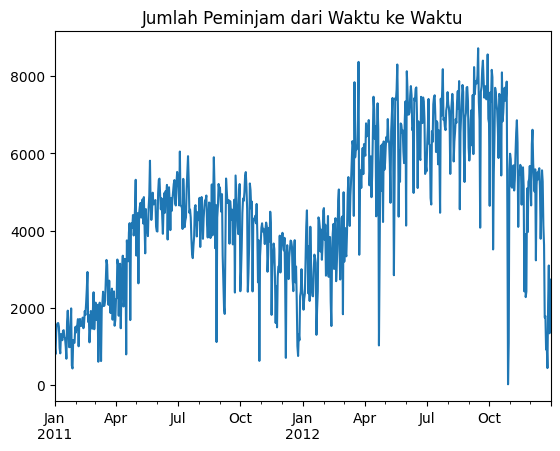

In [24]:
hour_df.groupby(['dteday']).cnt.sum().plot()
plt.xlabel('')
plt.title('Jumlah Peminjam dari Waktu ke Waktu')
plt.show()

**Kesimpulan**: Dari Januari 2011 sampai Juli 2011, jumlah peminjam sepeda terlihat meningkat. Namun, mengalami penurunan hingga Januari 2012. Kemudian naik lagi hingga Oktober 2012 lalu turun kembali. Jumlah peminjam sepeda terbanyak terjadi pada September 2012 tanggal 15, 29, dan 22. Sementara jumlah peminjam paling sedikit terjadi pada 29 Oktober 2012 dan 27 Januari 2011.

### 2. Bagaimana pengaruh temperatur terhadap jumlah peminjaman sepeda?

In [25]:
converted_temp_df.groupby(['converted_temp']).cnt.mean().sort_values()

converted_temp
-4.08      28.235294
-6.04      35.625000
-7.02      41.882353
-5.06      42.000000
-3.10      49.294118
-1.14      55.108696
-2.12      58.421053
 0.82      60.116129
-0.16      65.578261
 2.78      69.914489
 1.80      79.745763
 3.76      80.159004
 4.74      87.960644
 5.72     106.750831
 6.70     115.917317
 7.68     134.230769
 8.66     135.308527
 9.64     147.842027
 13.56    158.907298
 14.54    162.906977
 10.62    164.212366
 11.60    167.441368
 12.58    175.341241
 15.52    190.434028
 16.50    198.429379
 18.46    200.284710
 17.48    202.967626
 22.38    204.111570
 25.32    209.538682
 19.44    213.740933
 38.06    217.058824
 20.42    222.065574
 21.40    222.081481
 23.36    223.966763
 24.34    225.402597
 26.30    256.953623
 39.04    274.500000
 27.28    286.752632
 41.00    294.000000
 36.10    309.288889
 28.26    313.153101
 30.22    313.195266
 37.08    320.020408
 34.14    322.954198
 33.16    325.818841
 32.18    339.690141
 29.24    342.57575

<Axes: xlabel='converted_temp'>

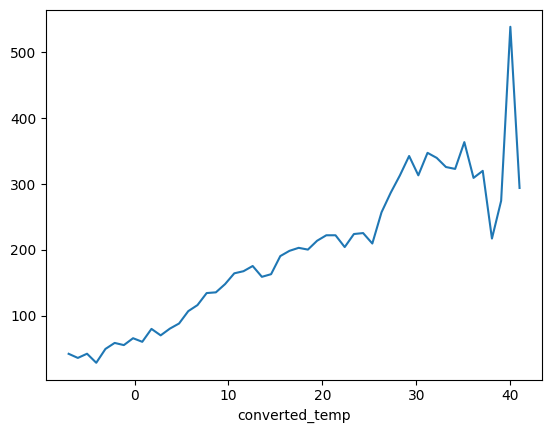

In [26]:
converted_temp_df.groupby(['converted_temp']).cnt.mean().plot()

**Kesimpulan**: Rata-rata peminjaman sepeda per jam meningkat seiring meningkatnya temperatur. Namun, berkurang drastis ketika mencapai temperatur 41$^∘$ C.

### 3. Apakah cuaca mempengaruhi peminjaman sepeda?

<ipython-input-27-54c309e08af9>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hour_df, x="weathersit", y="cnt", hue="workingday", ci=None)


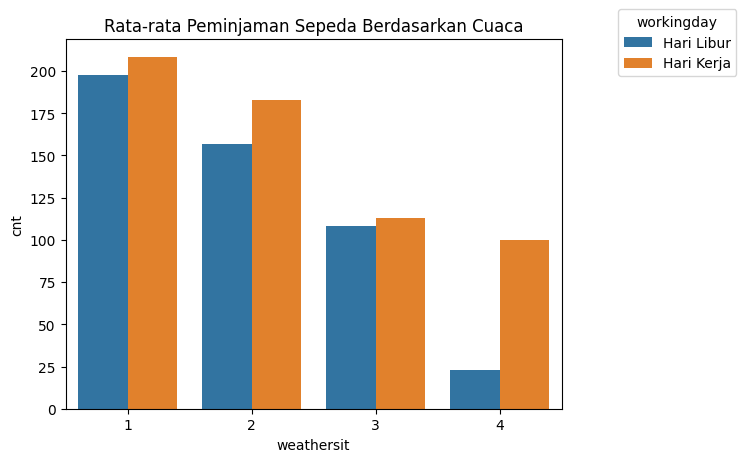

In [27]:
sns.barplot(data=hour_df, x="weathersit", y="cnt", hue="workingday", ci=None)
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Cuaca")
plt.legend(bbox_to_anchor=(1.1, 1.1), title='workingday', loc='upper left', labels=['Hari Libur', 'Hari Kerja'])
plt.show()

**Kesimpulan**: Cuaca terbaik untuk melakukan peminjaman adalah saat cuaca cerah.

### 4. Kapan waktu favorit peminjaman sepeda?

<ipython-input-28-2a856da061cc>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hour_df, x="hr", y="cnt", hue="workingday", ci=None)


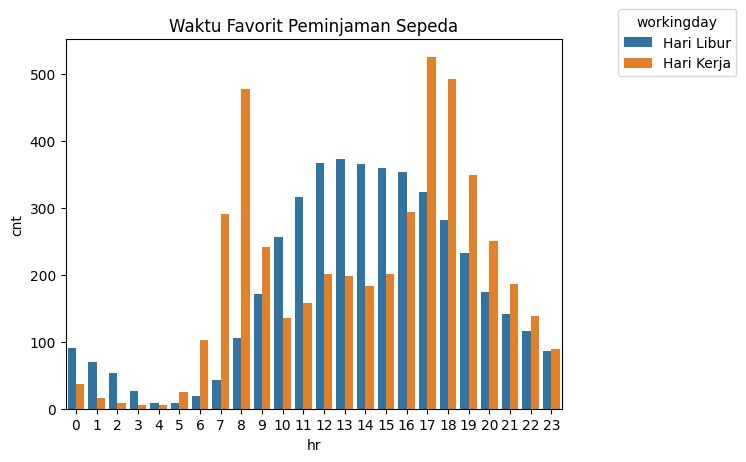

In [28]:
sns.barplot(data=hour_df, x="hr", y="cnt", hue="workingday", ci=None)
plt.title("Waktu Favorit Peminjaman Sepeda")
plt.legend(bbox_to_anchor=(1.1, 1.1), title='workingday', loc='upper left', labels=['Hari Libur', 'Hari Kerja'])
plt.show()

**Kesimpulan**: Pada saat hari kerja, waktu favorit peminjaman sepeda adalah jam 17.00, 18.00, dan 08.00. Sementara saat hari libur, terjadi pada jam 13.00.12.00, dan 14.00.

### 5. Apakah musim mempengaruhi jumlah peminjaman sepeda?

In [29]:
labels={1:'Musim Semi', 2:'Musim Panas', 3:'Musim Gugur', 4:'Musim Dingin'}
converted_season_df = hour_df
converted_season_df['converted_season']=converted_season_df['season'].map(labels)
converted_season_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,converted_temp,converted_season
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,3.76,Musim Semi
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2.78,Musim Semi
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2.78,Musim Semi
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,3.76,Musim Semi
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,3.76,Musim Semi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,4.74,Musim Semi
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,4.74,Musim Semi
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,4.74,Musim Semi
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,4.74,Musim Semi


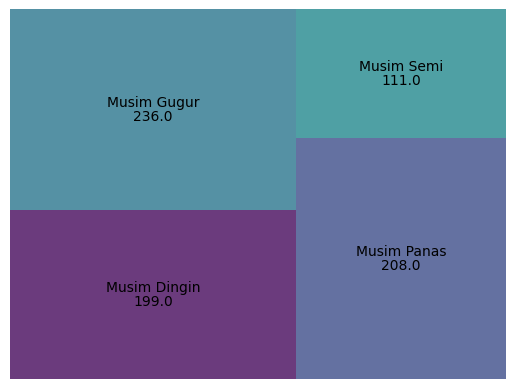

In [30]:
a = converted_season_df.groupby(['converted_season']).cnt.mean().index.get_level_values(0).tolist()
b = converted_season_df.groupby(['converted_season']).cnt.mean().reset_index().cnt.values.tolist()

squarify.plot(sizes=b, label=a, alpha=.8, value=np.round(b))
plt.axis('off')
plt.show()

**Kesimpulan**: Musim gugur menjadi musim dengan rata-rata peminjaman sepeda terbanyak dengan rata-rata 236 peminjaman per jam, diikuti musim panas, musim dingin, dan musim semi.

## Kesimpulan

Dari waktu ke waktu jumlah peminjam sepeda secara keseluruhan mengalami peningkatan walaupun beberapa kali mengalami penurunan seperti pada tanggal 29 Oktober 2012 dimana jumlah peminjam hanya 22 orang karena saat itu sedang terjadi badai pasir dan tanggal 27 Januari 2011 karena terjadi badai salju. Terlihat bahwa jumlah peminjam yang terdaftar lebih tinggi daripada jumlah peminjam umum. Secara khusus jumlah peminjam sepeda yang terdaftar lebih banyak saat hari kerja dibandingkan hari libur. Sedangkan jumlah peminjam umum lebih banyak saat hari libur dibandingkan hari kerja. Hal ini berarti peminjam yang terdaftar menggunakan sepeda untuk kegiatan sehari-hari seperti berangkat dan pulang kerja. Sedangkan untuk peminjam umum lebih banyak digunakan untuk liburan dan bersantai.

Beberapa faktor yang mempengaruhi rata-rata peminjaman sepeda adalah temperatur, cuaca, jam peminjaman, dan musim. Terlihat bahwa semakin naik temperatur semakin banyak peminjam sepeda terutama saat hari sedang cerah. Saat hari kerja rata-rata peminjaman terbanyak terjadi saat jam berangkat yaitu jam 08.00 dan pada saat jam pulang kerja yaitu jam 17.00 dan 18.00. Sedangkan saat hari libur rata-rata peminjaman terbanyak terjadi saat siang hari. Kemudian, musim gugur menjadi musim dengan rata-rata peminjaman sepeda terbanyak diikuti musim panas, musim dingin, dan musim semi.

Program peminjaman sepeda ini sangat baik, terlihat dari hasil analisis ini. Beberapa tambahan mungkin bisa jadi pertimbangan untuk dilakukan seperti penambahan titik untuk pengambilan dan pengembalian sepeda karena meningkatnya jumlah peminjam.